In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


def load_predictions(predictions_dir):
    predictions_list = []
    for file_name in os.listdir(predictions_dir):
        if file_name.endswith('.csv'):
            model_name = file_name.split('.')[0]
            df = pd.read_csv(os.path.join(predictions_dir, file_name))
            df['model'] = model_name  # Add model column
            predictions_list.append(df)
    predictions = pd.concat(predictions_list)
    return predictions


def compute_mean_f1(predictions):
    grouped_predictions = predictions.groupby(['model', 'true_label'])
    mean_f1 = grouped_predictions.apply(lambda group: f1_score(group['true_label'], group['prediction'], average='weighted'))
    return mean_f1


def plot_predictions(predictions, classification_type):

    # Mapping of class names to labels
    if classification_type == 'binary':
        label_mapping = {
            0: 'Rest',
            1: 'Animal'
        }
    elif classification_type == 'multi':
        label_mapping = {
            0: 'Remaining',
            1: 'Non-systematic-review',
            2: 'Human-non-RCT-non-drug-intervention',
            3: 'Human-non-RCT-drug-intervention',
            4: 'Human-case-report',
            5: 'Animal-other',
            6: 'Animal-drug-intervention',
            7: 'Human-systematic-review',
            8: 'In-vitro-study',
            9: 'Human-RCT-non-drug-intervention',
            10: 'Animal-non-drug-intervention',
            11: 'Human-RCT-drug-intervention',
            12: 'Clinical-study-protocol',
            13: 'Human-RCT-non-intervention'
        }

    models = predictions['model'].unique()

    for model in models:
        model_predictions = predictions[predictions['model'] == model]

        plt.figure(figsize=(8, 8))
        plt.title(f'Mean per-class Confidence and F1: {model}')

        # Group predictions by class label
        grouped_predictions = model_predictions.groupby('true_label')

        # Get unique class labels
        class_labels = list(grouped_predictions.groups.keys())
        class_labels.sort()  # Sort class labels

        # Compute mean confidence and mean F1 for each class
        mean_confidences = [grouped_predictions.get_group(class_label)['confidence'].mean() for class_label in class_labels]
        mean_f1 = compute_mean_f1(model_predictions)
        # Scale mean F1 to match the range of mean confidences
        mean_f1_scaled = np.interp(mean_f1, (mean_f1.min(), mean_f1.max()), (min(mean_confidences), max(mean_confidences)))

        # Convert class labels to class names
        class_names = [label_mapping[label] for label in class_labels]

        # Plot mean confidence
        plt.bar(class_names, mean_confidences, color='darkseagreen', label='Mean Confidence')
        # Plot mean F1
        plt.plot(class_names, mean_f1_scaled, color='red', marker='o', label='Mean F1')
        
        plt.xlabel('Class Name')
        plt.ylabel('Score')
        plt.grid(True)
        plt.xticks(rotation=90, ha='right')
        plt.legend(loc='upper left')
        # save to file as png
        output_dir = os.path.join(f'./../../models/transformers/evaluations/{classification_type}', 'F1_to_confidence')
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(f'{output_dir}/{model}.png', bbox_inches='tight')

        plt.show()


def main(classification_type):
    # Directory containing prediction files
    predictions_dir = f'./../../models/transformers/evaluations/{classification_type}/predictions'
    predictions = load_predictions(predictions_dir)
    
    # Plot predictions
    plot_predictions(predictions, classification_type)


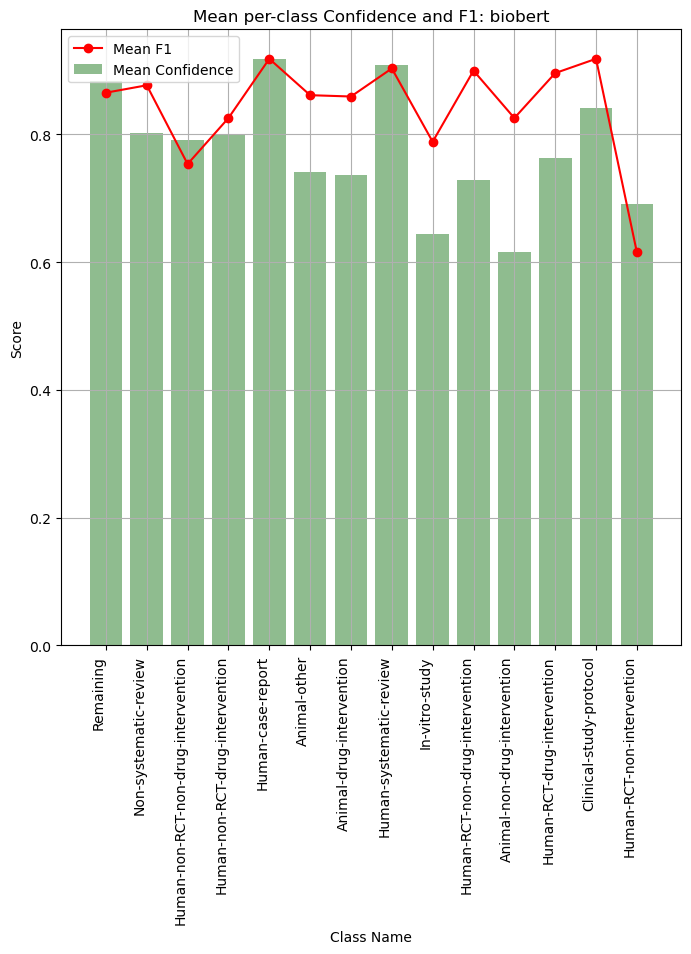

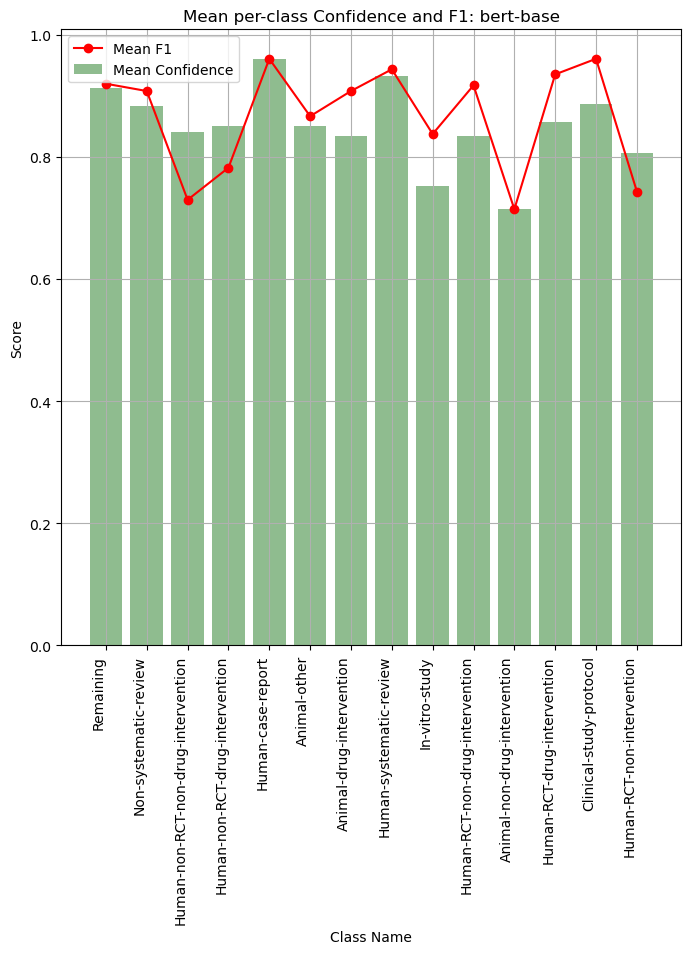

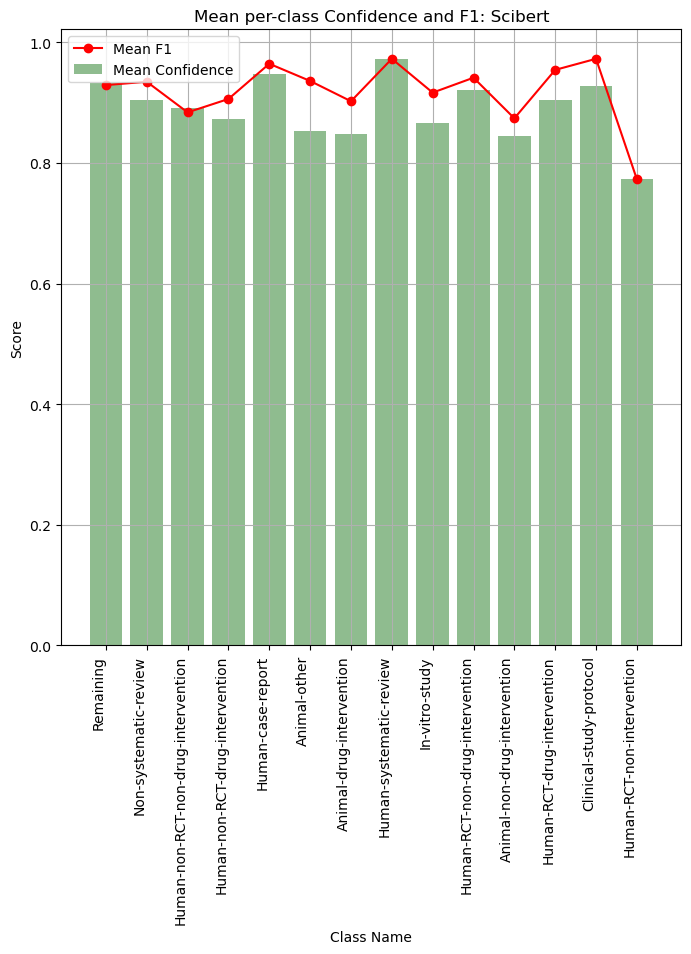

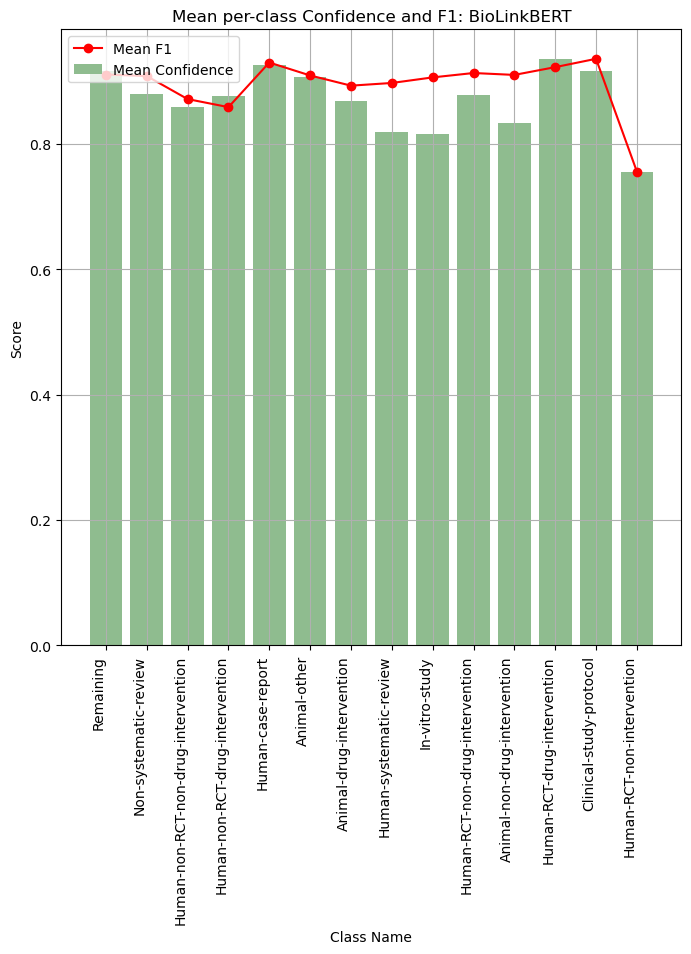

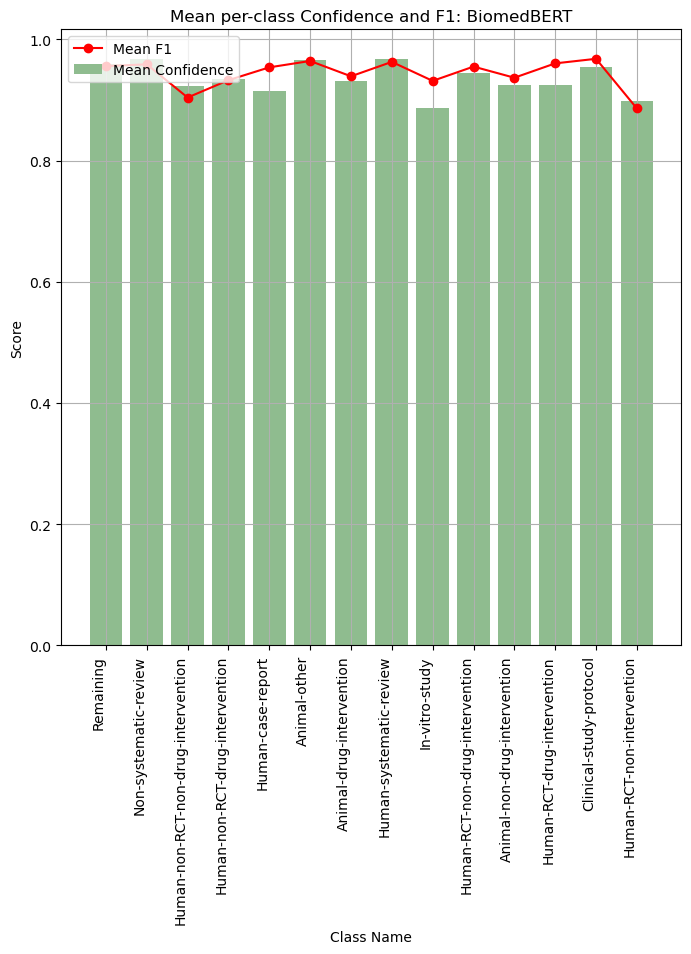

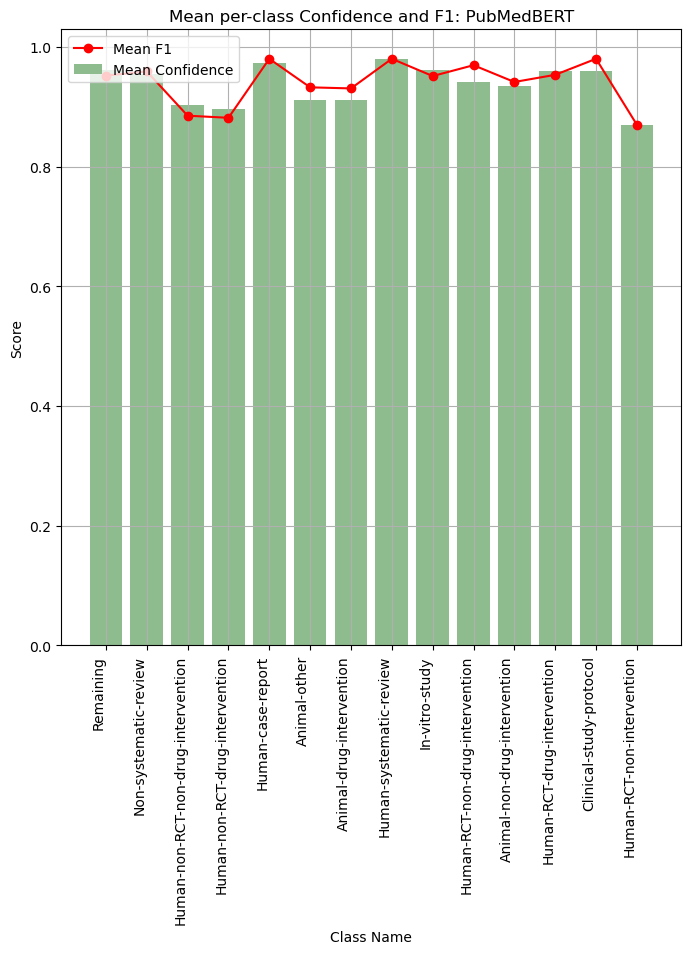

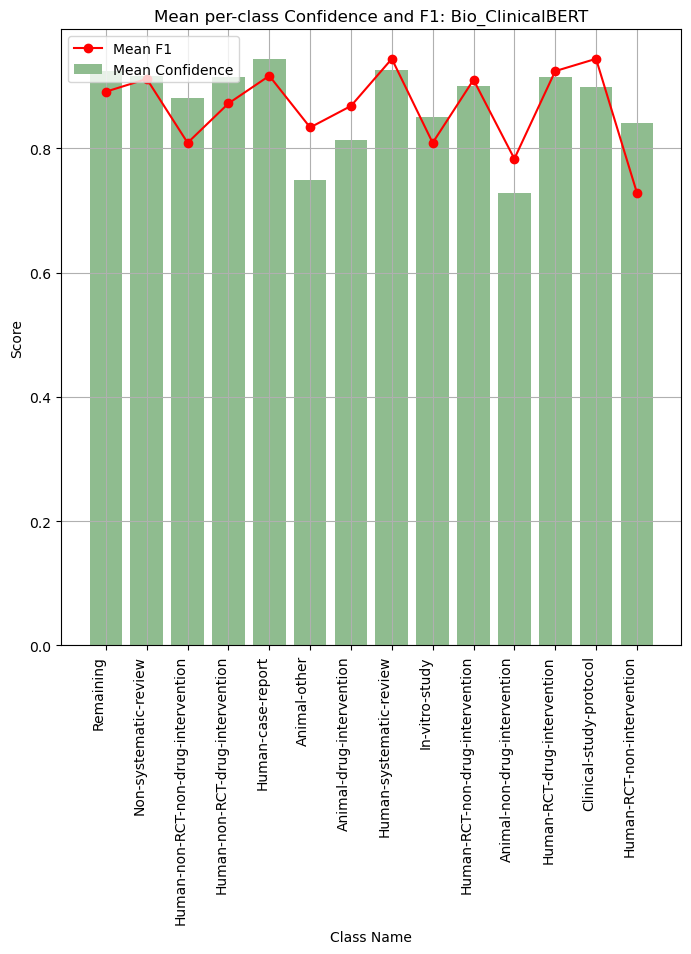

In [45]:
if __name__ == "__main__":
    main(classification_type='multi')

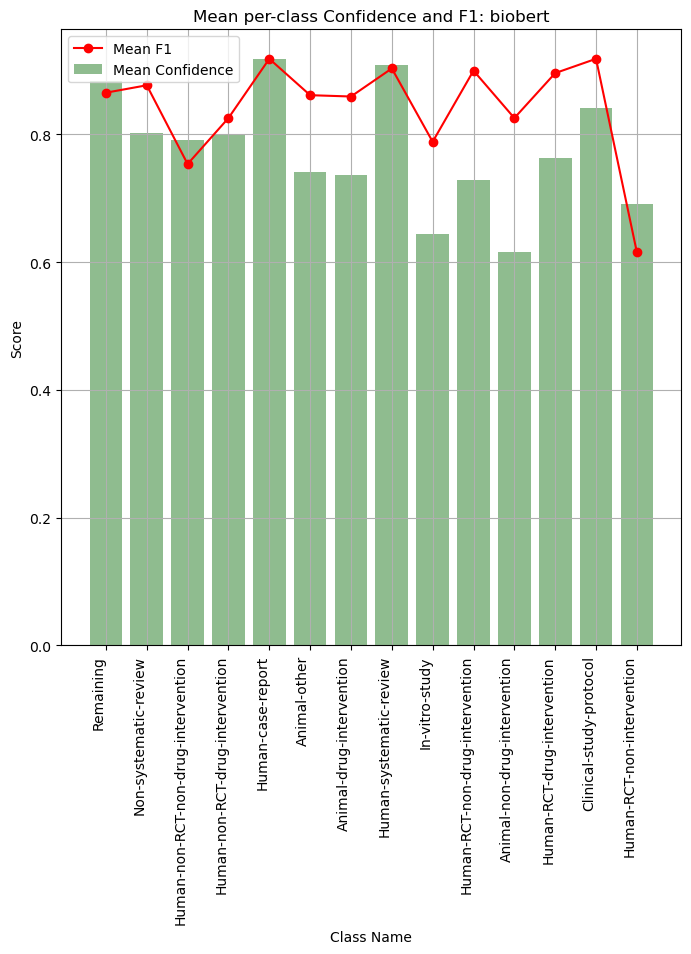

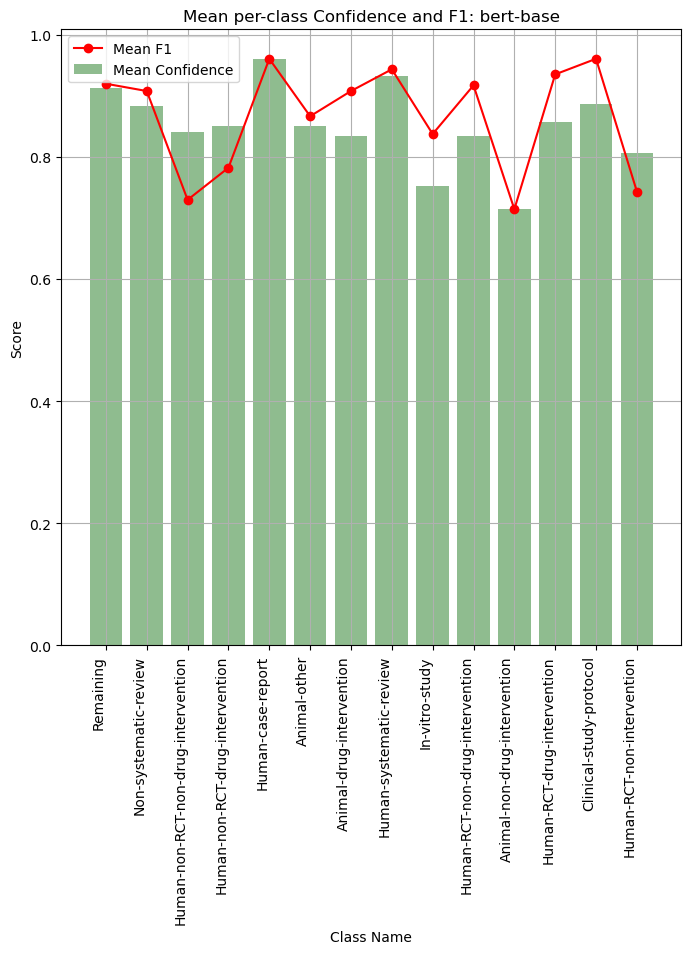

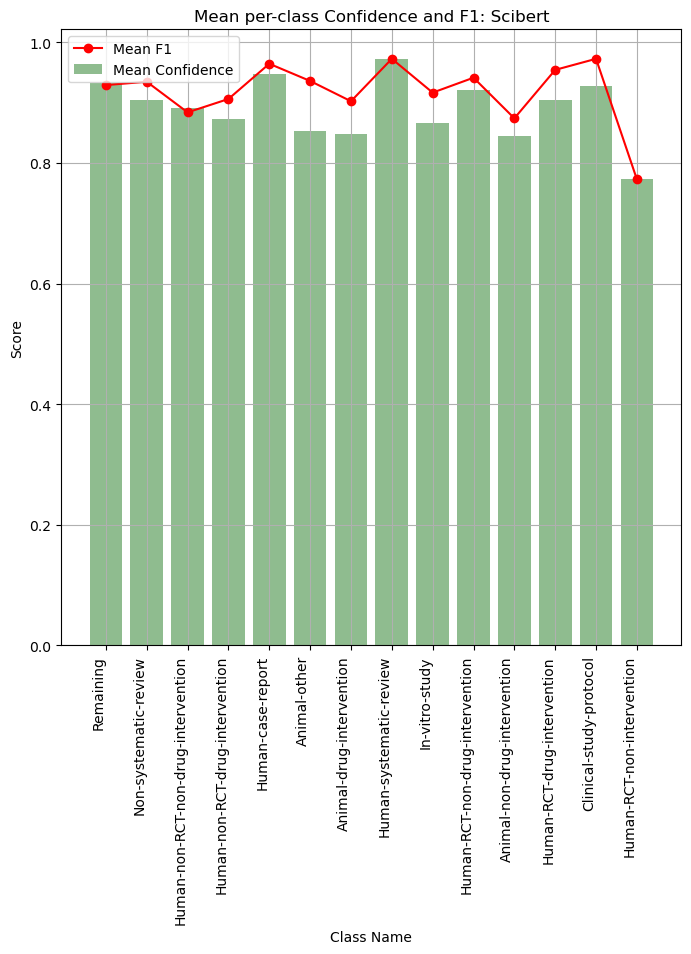

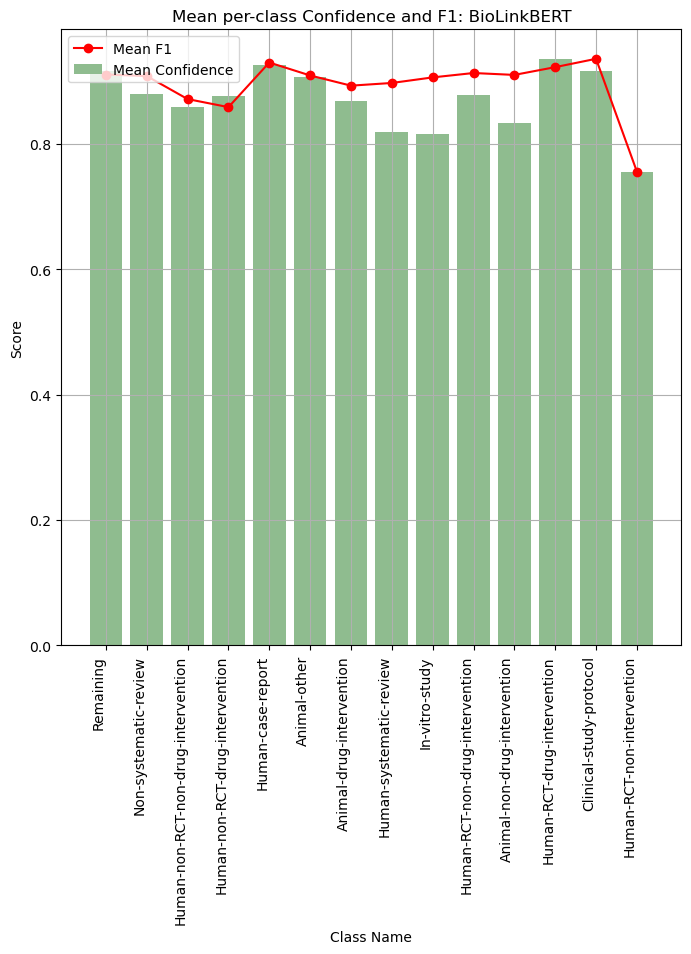

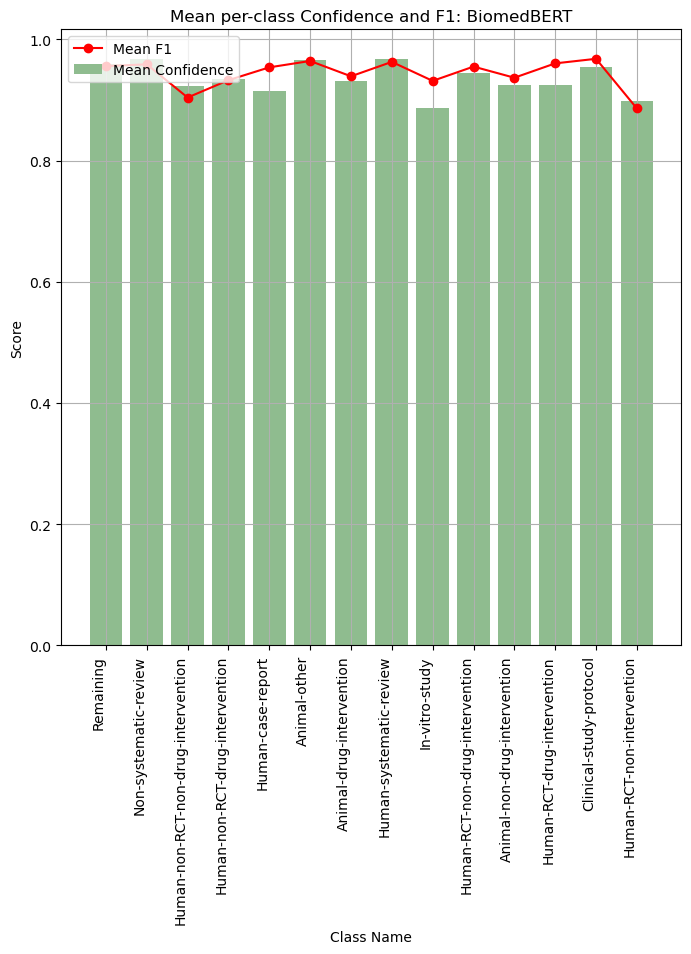

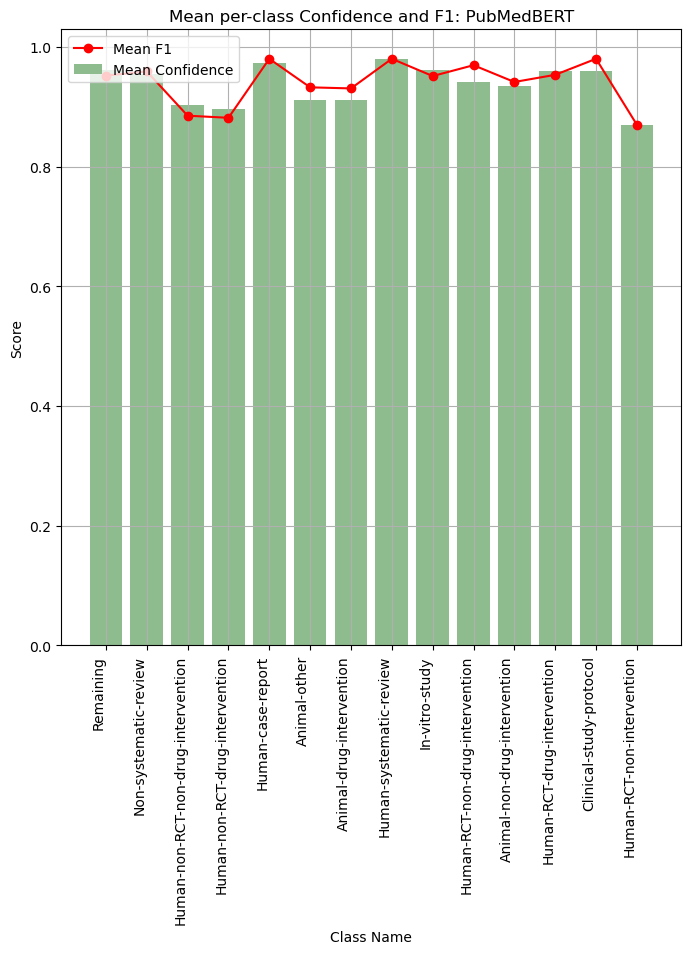

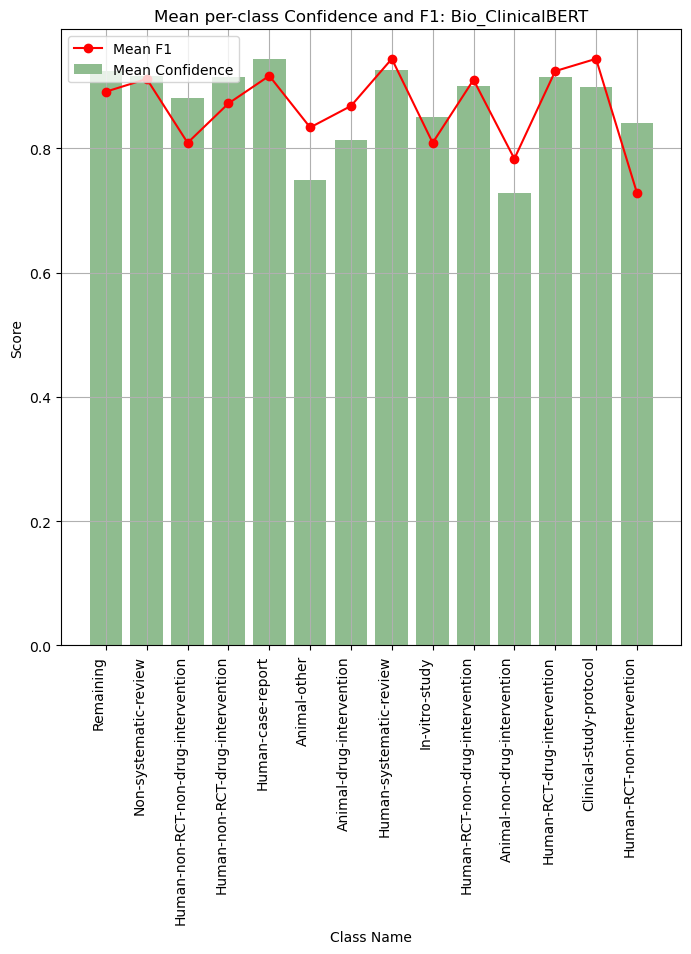

In [46]:
if __name__ == "__main__":
    main(classification_type='multi')